<a href="https://colab.research.google.com/github/nivedhakannan-77/brain_stock_detection_cnn/blob/main/Brain_Stroke_Detection_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
iashiqul_brain_stroke_prediction_ct_scan_image_dataset_path = kagglehub.dataset_download('iashiqul/brain-stroke-prediction-ct-scan-image-dataset')

print('Data source import complete.')

100%|██████████| 60.7M/60.7M [00:00<00:00, 84.6MB/s]

Extracting files...


Data source import complete.


# Import Library

In [ ]:
import os
import cv2
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Dataset Load and Spliting

In [ ]:
data_dir = '/kaggle/input/brain-stroke-prediction-ct-scan-image-dataset/Brain_Stroke_CT-SCAN_image'
train_dir = os.path.join(data_dir, 'Train')
test_dir = os.path.join(data_dir, 'Test')
validation_dir = os.path.join(data_dir, 'Validation')

In [ ]:
import zipfile
import os

zip_path = "/content/archive(4).zip"  # <-- use the actual file name you saw
extract_path = "/content/brain_data"

# Extract the ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check what was extracted
print("Extracted folders/files:", os.listdir(extract_path))


Extracted folders/files: ['Brain_Stroke_CT-SCAN_image']


In [ ]:
base_path = "/content/brain_data/Brain_Stroke_CT-SCAN_image"
train_dir = os.path.join(base_path, "Train")
validation_dir = os.path.join(base_path, "Validation")
test_dir = os.path.join(base_path, "Test")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 256, 256

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)


Found 1843 images belonging to 2 classes.
Found 235 images belonging to 2 classes.


# Pre-processing

In [ ]:
# Image dimensions
img_width, img_height = 256, 256

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)


Found 1843 images belonging to 2 classes.
Found 235 images belonging to 2 classes.


# Create BSP Model Architecture

In [ ]:
# Step 2: Model Architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     7,372,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,466,177 (28.48 MB)

 Trainable params: 7,466,177 (28.48 MB)

 Non-trainable params: 0 (0.00 B)

# Train and Test Model

In [ ]:
# Step 3: Model Training
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)

# Step 4: Model Evaluation
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

loss, accuracy = model.evaluate(test_generator)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 269s 5s/step - accuracy: 0.5529 - loss: 0.7782 - val_accuracy: 0.7489 - val_loss: 0.4483
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 258s 4s/step - accuracy: 0.7942 - loss: 0.4377 - val_accuracy: 0.9106 - val_loss: 0.2539
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 269s 5s/step - accuracy: 0.9373 - loss: 0.1775 - val_accuracy: 0.9404 - val_loss: 0.1357
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 257s 4s/step - accuracy: 0.9665 - loss: 0.0842 - val_accuracy: 0.9574 - val_loss: 0.1561
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 268s 5s/step - accuracy: 0.9834 - loss: 0.0401 - val_accuracy: 0.9957 - val_loss: 0.0279
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 257s 4s/step - accuracy: 0.9992 - loss: 0.0112 - val_accuracy: 0.9787 - val_loss: 0.0508
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 256s 4s/step - accuracy: 0.9999 - loss: 0.0027 - val_accuracy: 0.9745 - val_loss: 0.1302
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 268s 5s/step - accuracy: 0.9906 - loss: 0.0312 - val_accuracy: 0.9702 - v

In [ ]:
model.save("brain_stroke_model.keras")
model = tf.keras.models.load_model("brain_stroke_model.keras")


# Accuracy And Loss Curve

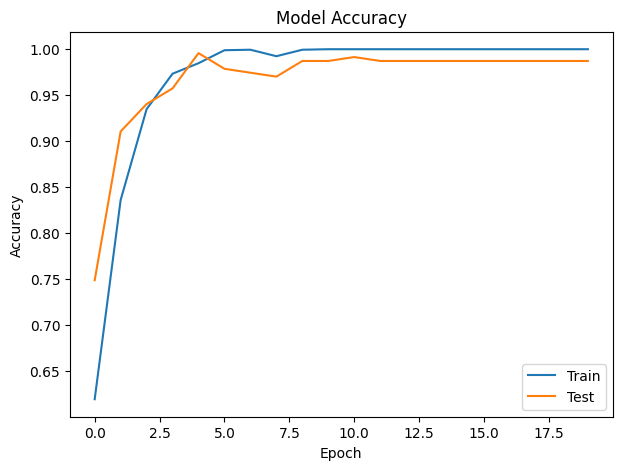

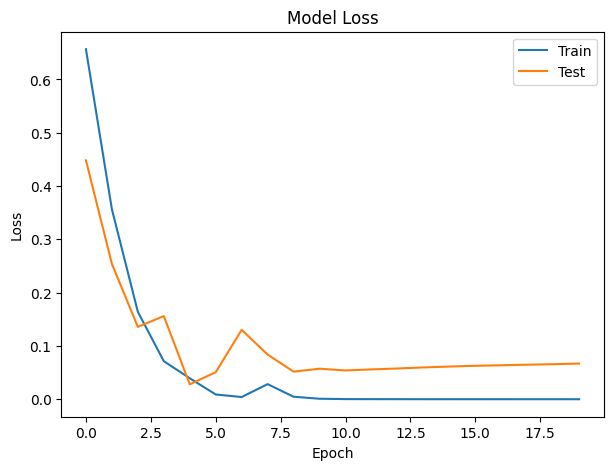

In [ ]:

# Plot accuracy versus epoch
beingsaved = plt.figure(figsize=(7, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
beingsaved.savefig('Accuracy.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Plot loss versus epoch
beingsaved = plt.figure(figsize=(7, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
beingsaved.savefig('Loss.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Evulation Model

Found 437 images belonging to 2 classes.
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       307
           1       0.87      0.99      0.93       130

    accuracy                           0.95       437
   macro avg       0.93      0.97      0.95       437
weighted avg       0.96      0.95      0.96       437


------------------------------------------------------

Accuracy: 0.954233409610984
Precision: 0.8716216216216216
Recall: 0.9923076923076923
F1 Score: 0.9280575539568345

------------------------------------------------------




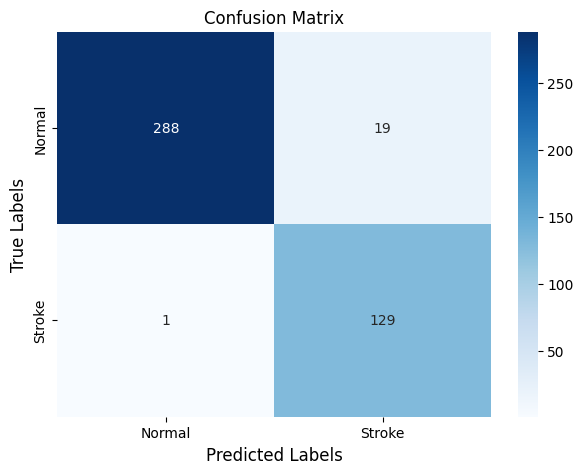

In [ ]:
# Step 4: Model Evaluation
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).flatten()
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
accuracy=accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print('\nClassification Report:\n')
print(classification_report(y_true, y_pred))
print('\n------------------------------------------------------\n')

print('Accuracy:',accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

print('\n------------------------------------------------------\n\n')
# Plot confusion matrix
label_names = ['Normal', 'Stroke']  # Replace with your class labels
beingsaved = plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xticks(np.arange(len(label_names)) + 0.5, label_names)
plt.yticks(np.arange(len(label_names)) + 0.5, label_names)
plt.xlabel('Predicted Labels',fontsize=12)
plt.ylabel('True Labels',fontsize=12)
plt.title('Confusion Matrix')
beingsaved.savefig('Stroke_Confusion_Matrix.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

In [ ]:
for layer in model.layers:
    print(layer.name)

conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
flatten
dense
dense_1


In [ ]:
# Dummy input to build the model (e.g. shape [1, 256, 256, 3])
dummy_input = tf.random.normal((1, 256, 256, 3))
_ = model(dummy_input)  # This "calls" the model


In [ ]:
_ = model.predict(np.zeros((1, img_width, img_height, 3)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


In [ ]:
for layer in model.layers:
    print(layer.name)


conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
flatten
dense
dense_1


# Detection Stroke using Grad Cam

In [ ]:
def Affected_Area(img_path):

    image = cv2.imread(img_path)
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply image processing operations (e.g., thresholding, morphological operations) for stroke detection
    _, thresholded_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)

    # Find contours in the closed image
    contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a list to store the bounding boxes
    bounding_boxes = []

    # Draw bounding boxes around the contours
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        bounding_boxes.append((x, y, x + w, y + h))
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image



In [ ]:
target_class_index = 1
img_path = '/content/brain_data/Brain_Stroke_CT-SCAN_image/Test/Stroke/58 (12).jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (img_width, img_height))
img = np.expand_dims(img, axis=0) / 255.0

In [ ]:
for i, layer in enumerate(model.layers):
    print(f"{i}: {layer.name}")


0: conv2d
1: max_pooling2d
2: conv2d_1
3: max_pooling2d_1
4: conv2d_2
5: max_pooling2d_2
6: flatten
7: dense
8: dense_1


In [ ]:
if hasattr(model, 'history') and model.history.history:
    print("✅ Model has been trained.")
else:
    print("⚠️ Model has NOT been trained yet.")


✅ Model has been trained.


In [ ]:
model.save('/content/brain_stroke_model.h5')

In [ ]:
# Save the trained model in the recommended format
model.save('stroke_model.keras')  # This saves the model architecture, weights, and optimizer state


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('stroke_model.keras')

# Use the model (e.g., to make predictions)
# Example: predictions = model.predict(x_test)


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ... (rest of your code)

# Load model
model = tf.keras.models.load_model('stroke_model.keras')  # use your correct path here

# Consistent image dimensions
img_width, img_height = 256, 256  # use your model's input size (same as training)

# ... (rest of your prediction code)


In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 conv2d
1 max_pooling2d
2 conv2d_1
3 max_pooling2d_1
4 conv2d_2
5 max_pooling2d_2
6 flatten
7 dense
8 dense_1


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to highlight affected area using contours
def Affected_Area(img_path):
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresholded_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

# Load model
model = tf.keras.models.load_model('stroke_model.keras')  # use your correct path here

# Consistent image dimensions - This is the key fix
img_width, img_height = 256, 256  # use your model's input size (same as training)

# Prepare image
img_path = '/content/brain_data/Brain_Stroke_CT-SCAN_image/Test/Stroke/58 (12).jpg'
img = cv2.imread(img_path)
img_resized = cv2.resize(img, (img_width, img_height))
input_img = np.expand_dims(img_resized, axis=0) / 255.0



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def saliency_map(model, image_tensor):
    image_tensor = tf.convert_to_tensor(image_tensor)
    image_tensor = tf.Variable(image_tensor)

    with tf.GradientTape() as tape:
        predictions = model(image_tensor)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, image_tensor)
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image_tensor[0])
    plt.axis('off')
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(saliency, cmap='hot')
    plt.axis('off')
    plt.title("Saliency Map")
    plt.show()


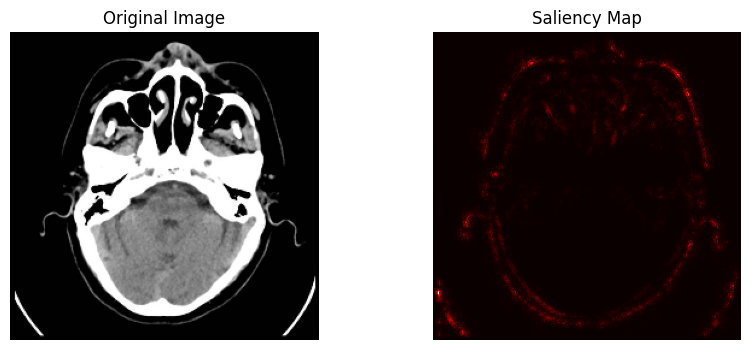

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def saliency_map(model, image_path, img_width, img_height):
    """
    Generates and displays a saliency map for an image.

    Args:
        model: The Keras model.
        image_path: Path to the image file.
        img_width: Width to resize the image to.
        img_height: Height to resize the image to.
    """

    # Load and preprocess the image with consistent resizing
    img = cv2.imread(image_path)
    img = cv2.resize(img, (img_width, img_height))
    image_tensor = np.expand_dims(img, axis=0) / 255.0
    image_tensor = tf.convert_to_tensor(image_tensor, dtype=tf.float32)
    image_tensor = tf.Variable(image_tensor)

    with tf.GradientTape() as tape:
        predictions = model(image_tensor)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, image_tensor)
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image_tensor[0])
    plt.axis('off')
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(saliency, cmap='hot')
    plt.axis('off')
    plt.title("Saliency Map")
    plt.show()

# ... (rest of your imports and code)

# Load model
model = tf.keras.models.load_model('stroke_model.keras')

# Consistent image dimensions - use your model's input size (same as training)
img_width, img_height = 256, 256

# Call saliency_map with the image path and resizing parameters
img_path = '/content/brain_data/Brain_Stroke_CT-SCAN_image/Test/Stroke/58 (12).jpg'
saliency_map(model, img_path, img_width, img_height)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
Prediction: Stroke


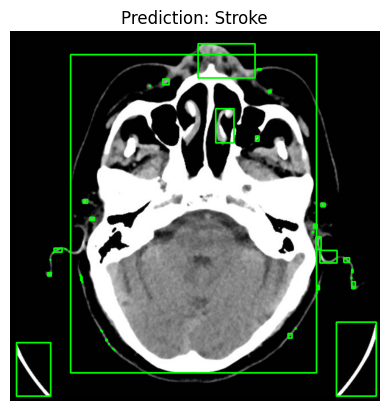

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to highlight affected area using contours
def Affected_Area(img_path):
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresholded_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

# Load model
model = tf.keras.models.load_model('stroke_model.keras')  # use your correct path here

# Consistent image dimensions - This is the key fix
img_width, img_height = 256, 256  # use your model's input size (same as training)

def detect_stroke(image_path):
    """
    Detects stroke in an image and highlights the affected area.

    Args:
        image_path: Path to the image file.

    Returns:
        A tuple containing:
            - Prediction (0 for No Stroke, 1 for Stroke)
            - Original image with affected area highlighted (if Stroke is predicted)
    """
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (img_width, img_height))
    input_img = np.expand_dims(img_resized, axis=0) / 255.0

    # Make prediction
    prediction = model.predict(input_img)[0][0]
    predicted_class_index = int(prediction >= 0.5)

    # Highlight affected area if stroke is detected
    if predicted_class_index == 1:
        highlighted_image = Affected_Area(image_path)
        return predicted_class_index, highlighted_image
    else:
        return predicted_class_index, img # Return original image if no stroke

# Example usage
image_path = '/content/brain_data/Brain_Stroke_CT-SCAN_image/Test/Stroke/58 (12).jpg'
prediction, result_image = detect_stroke(image_path)

class_names = ['No Stroke', 'Stroke']
print(f"Prediction: {class_names[prediction]}")

plt.imshow(result_image)
plt.title(f"Prediction: {class_names[prediction]}")
plt.axis('off')
plt.show()

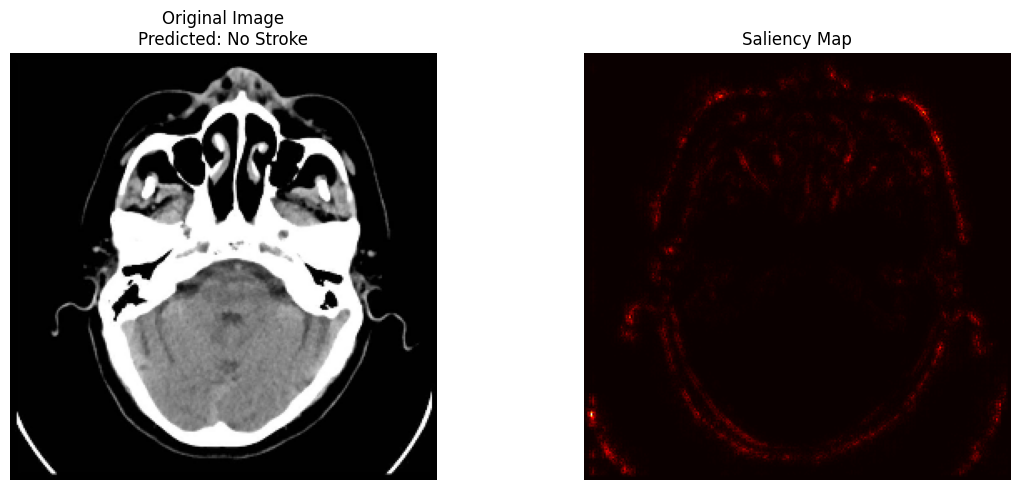

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def saliency_map_with_prediction(model, image_path, img_width, img_height, class_names):
    """
    Generates saliency map and shows prediction with original image.

    Args:
        model: Trained Keras model.
        image_path: Path to image.
        img_width, img_height: Size to resize images to.
        class_names: List of class names (e.g., ['No Stroke', 'Stroke']).
    """
    # Load and preprocess image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (img_width, img_height))
    image_tensor = np.expand_dims(img_resized, axis=0) / 255.0
    image_tensor = tf.convert_to_tensor(image_tensor, dtype=tf.float32)
    image_tensor = tf.Variable(image_tensor)

    # Get prediction and saliency map
    with tf.GradientTape() as tape:
        predictions = model(image_tensor)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, image_tensor)
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]

    predicted_label = class_names[int(class_idx)]

    # Display results
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img_resized)
    plt.title(f"Original Image\nPredicted: {predicted_label}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(saliency, cmap='hot')
    plt.title("Saliency Map")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
model = tf.keras.models.load_model('stroke_model.keras')
img_path = '/content/brain_data/Brain_Stroke_CT-SCAN_image/Test/Stroke/58 (12).jpg'
img_width, img_height = 256, 256
class_names = ['No Stroke', 'Stroke']

saliency_map_with_prediction(model, img_path, img_width, img_height, class_names)


INTEGRATED GRADIENT

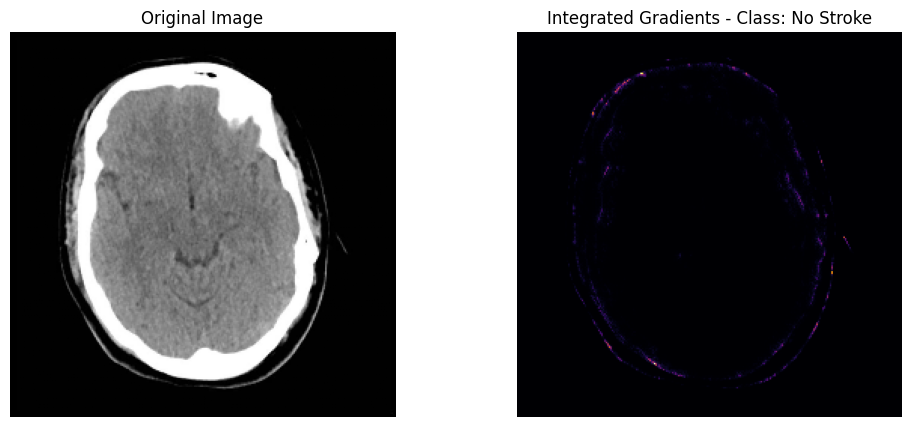

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

def interpolate_images(baseline, image, alphas):
    alphas_x = alphas[:, tf.newaxis, tf.newaxis, tf.newaxis]
    return baseline + alphas_x * (image - baseline)

def compute_gradients(model, images, class_index):
    with tf.GradientTape() as tape:
        tape.watch(images)
        probs = model(images)
        # Fix: Access the correct element for binary classification
        outputs = probs[:, 0]  # probs is a single value, so use index 0
    return tape.gradient(outputs, images)

def integrated_gradients(model, image, baseline=None, class_index=None, m_steps=50):
    if baseline is None:
        baseline = tf.zeros(shape=image.shape)

    # 1. Generate alphas for interpolation
    alphas = tf.linspace(start=0.0, stop=1.0, num=m_steps)

    # 2. Interpolate between baseline and image
    interpolated_images = interpolate_images(baseline, image, alphas)

    # 3. Compute gradients for interpolated images
    grads = compute_gradients(model, interpolated_images, class_index)

    # 4. Average gradients
    avg_grads = tf.reduce_mean(grads, axis=0)

    # 5. Compute integrated gradients
    integrated_grads = (image - baseline) * avg_grads
    return integrated_grads

# =========================
# Load your model
# =========================
model = tf.keras.models.load_model('stroke_model.keras')

# =========================
# Load and preprocess image
# =========================
img_path = '/content/brain_data/Brain_Stroke_CT-SCAN_image/Test/Normal/100 (14).jpg'
img_width, img_height = 256, 256
img = cv2.imread(img_path)
img = cv2.resize(img, (img_width, img_height))
img = img / 255.0
input_tensor = tf.convert_to_tensor(np.expand_dims(img, axis=0), dtype=tf.float32)

# =========================
# Get predicted class index
# =========================
preds = model(input_tensor)
class_index = int(preds[0] >= 0.5)  # For binary classification

# =========================
# Run Integrated Gradients
# =========================
attributions = integrated_gradients(model, input_tensor, class_index=class_index, m_steps=100)
attributions = tf.reduce_sum(tf.math.abs(attributions), axis=-1)[0]  # Sum over color channels

# =========================
# Plot results
# =========================
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(attributions, cmap='inferno')
plt.title(f'Integrated Gradients - Class: {["No Stroke", "Stroke"][class_index]}')
plt.axis('off')
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


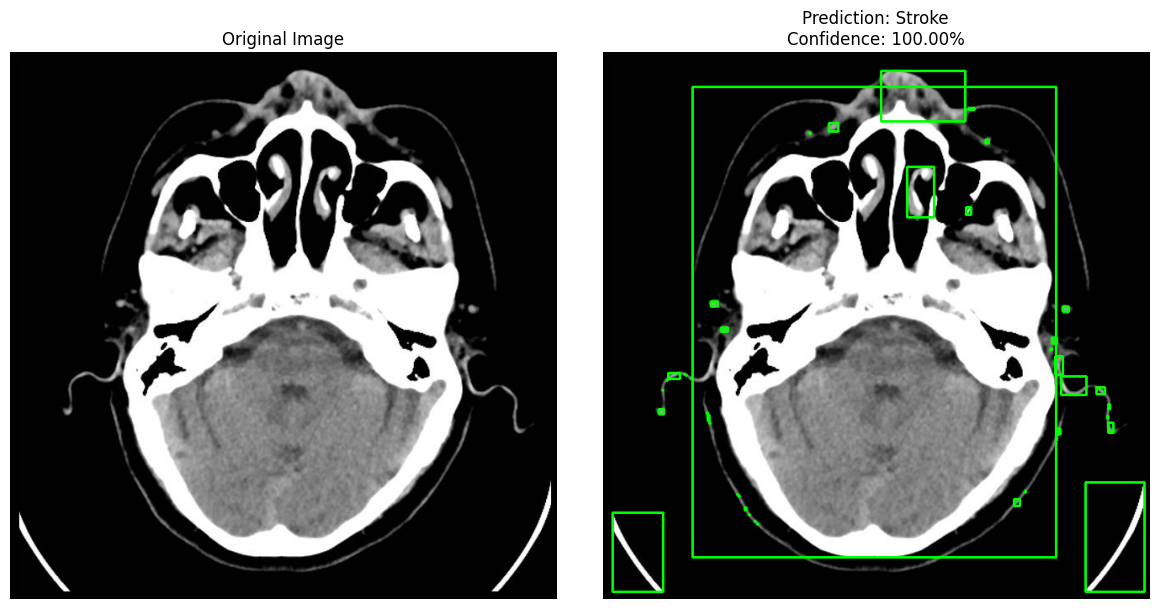

Prediction: Stroke
Confidence: 100.00%


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ------------------------------
# Function to highlight affected area using contours
# ------------------------------
def Affected_Area(img_path):
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresholded_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes for each detected contour
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# ------------------------------
# Load trained model
# ------------------------------
model = tf.keras.models.load_model('/content/stroke_model.keras')  # Change path if needed

# Model input size (must match training size)
IMG_WIDTH, IMG_HEIGHT = 256, 256

# ------------------------------
# Function to detect stroke
# ------------------------------
def detect_stroke(image_path):
    """
    Detects stroke in an image and highlights the affected area.
    Returns:
        predicted_class_index (int): 0 = No Stroke, 1 = Stroke
        confidence (float): Probability score of stroke
        result_image (ndarray): Output image (highlighted if stroke)
    """
    # Load and preprocess image
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    input_img = np.expand_dims(img_resized, axis=0) / 255.0

    # Predict
    prediction = model.predict(input_img)[0][0]
    predicted_class_index = int(prediction >= 0.5)
    confidence = prediction if predicted_class_index == 1 else 1 - prediction

    # Highlight affected area if stroke is detected
    if predicted_class_index == 1:
        highlighted_image = Affected_Area(image_path)
        return predicted_class_index, confidence, highlighted_image
    else:
        return predicted_class_index, confidence, cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ------------------------------
# Example usage
# ------------------------------
image_path = '/content/brain_data/Brain_Stroke_CT-SCAN_image/Test/Stroke/58 (12).jpg'  # Change to your image path

prediction, confidence, result_image = detect_stroke(image_path)

# Load original image for comparison
original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

class_names = ['No Stroke', 'Stroke']
label = class_names[prediction]

# ------------------------------
# Display both original and predicted images
# ------------------------------
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')

# Predicted / Processed image
plt.subplot(1, 2, 2)
plt.imshow(result_image)
plt.title(f"Prediction: {label}\nConfidence: {confidence*100:.2f}%")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print in console too
print(f"Prediction: {label}")
print(f"Confidence: {confidence*100:.2f}%")